In [95]:
import numpy as np
import pandas as pd

import pandas as pd

from statsmodels.discrete import discrete_model
import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import Poisson as psn,NegativeBinomial as ngb,MNLogit


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import random

import scipy
from scipy import stats
from scipy.stats import binom,poisson,norm,t

import pylab
from pylab import legend, plot, show ,title, xlabel, ylabel

import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels.stats import proportion as ssp

from scipy.stats import chisquare, chi2_contingency

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report

from statsmodels import discrete
from statsmodels.discrete import discrete_model
from statsmodels.discrete.discrete_model import MNLogit

from statsmodels.miscmodels.ordinal_model import OrderedModel

from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.feature_selection import mutual_info_classif,SelectKBest

from sklearn.ensemble import ExtraTreesClassifier
    

# Feature scaling-
- Feature scaling - scaling of variables is required specifically in those models where the calculations are based on the distance between the different points.
- It is mainly done when we need to compare between two quantities(which have different scales) for example a cmparison between weight(kgs) and money(price).
- Generally to be done before splitting the dataset.

- Scaling is a necessity for these algorithms-
1. KNN - K-Nearest Neighbours
2. K-means clustering
3. Principal Component Analysis(PCA)
4. Support Vector Machines(SVM)

- Scaling is not required -Decision Trees, random forest and the boosting algorithms(XGBoost,GradientBoosting).

- Decision Trees and Random Forest are not affected by outliers

- As compared to that, regression models are more affected by outliers.

- So generally wherever scaling is not required, those models are not affected by outliers

# Scaling of variables-

In [39]:
df=pd.read_excel('CDAC_DataBook.xlsx',sheet_name='clusters')

In [40]:
df.head()

,Var1,Var2
0,25,79
1,34,51
2,22,53
3,27,78
4,33,59


In [41]:
df.describe()

,Var1,Var2
count,30.000000,30.000000
mean,42.633333,43.200000
std,12.220625,22.932284
min,22.000000,5.000000
25%,33.250000,25.500000
50%,43.500000,48.500000
75%,50.750000,58.750000
max,67.000000,79.000000


# Min Max Scaler-

Formula - (x-min)/(max-min)

x -> every value of the dataset<br>
min -> min value of the dataset<br>
max -> max value of the dataset<br>

In [42]:
sc1=MinMaxScaler()

In [43]:
scaled_df=sc1.fit_transform(df)
scaled_df

array([[0.06666667, 1.        ],
       [0.26666667, 0.62162162],
       [0.        , 0.64864865],
       [0.11111111, 0.98648649],
       [0.24444444, 0.72972973],
       [0.24444444, 0.93243243],
       [0.2       , 0.91891892],
       [0.        , 0.7027027 ],
       [0.28888889, 0.86486486],
       [0.26666667, 0.94594595],
       [1.        , 0.62162162],
       [0.71111111, 0.36486486],
       [0.77777778, 0.47297297],
       [0.46666667, 0.56756757],
       [0.62222222, 0.64864865],
       [0.77777778, 0.41891892],
       [0.82222222, 0.40540541],
       [0.66666667, 0.71621622],
       [0.95555556, 0.72972973],
       [0.55555556, 0.60810811],
       [0.6       , 0.27027027],
       [0.57777778, 0.2027027 ],
       [0.28888889, 0.12162162],
       [0.24444444, 0.09459459],
       [0.48888889, 0.2027027 ],
       [0.51111111, 0.        ],
       [0.35555556, 0.32432432],
       [0.46666667, 0.2972973 ],
       [0.64444444, 0.04054054],
       [0.53333333, 0.02702703]])

In [44]:
scaled_df=pd.DataFrame(scaled_df)
scaled_df.head()

,0,1
0,0.066667,1.000000
1,0.266667,0.621622
2,0.000000,0.648649
3,0.111111,0.986486
4,0.244444,0.729730


In [45]:
scaled_df.describe()

,0,1
count,30.000000,30.000000
mean,0.458519,0.516216
std,0.271569,0.309896
min,0.000000,0.000000
25%,0.250000,0.277027
50%,0.477778,0.587838
75%,0.638889,0.726351
max,1.000000,1.000000


# Standard Scaler-
Formula - Z=(x-µ)/σ

x -> every value of the dataset<br>

In [46]:
sc2=StandardScaler()

In [47]:
scaled_df=pd.DataFrame(sc2.fit_transform(df))

In [48]:
scaled_df.head()

,0,1
0,-1.467583,1.587806
1,-0.718533,0.345946
2,-1.717266,0.434651
3,-1.301127,1.543454
4,-0.801761,0.700763


In [49]:
df.head()

,Var1,Var2
0,25,79
1,34,51
2,22,53
3,27,78
4,33,59


In [50]:
var1=df['Var1']


In [51]:
(25-np.mean(var1))/np.std(var1)  #should give -1.46

np.float64(-1.4675828367556647)

In [52]:
df.describe()

,Var1,Var2
count,30.000000,30.000000
mean,42.633333,43.200000
std,12.220625,22.932284
min,22.000000,5.000000
25%,33.250000,25.500000
50%,43.500000,48.500000
75%,50.750000,58.750000
max,67.000000,79.000000


In [53]:
np.mean(scaled_df[0])

np.float64(1.850371707708594e-17)

In [54]:
np.std(scaled_df[0])

np.float64(1.0)

In [55]:
np.min(scaled_df[0])

np.float64(-1.7172661171110708)

In [56]:
np.max(scaled_df[0])

np.float64(2.027983088220021)

In [57]:
df=pd.read_excel('CDAC_DataBook.xlsx',sheet_name='diabetes')


In [58]:
diet_dum=pd.get_dummies(df.DietType,prefix='diet',drop_first=True,dtype=int)

In [59]:
df=df.drop('DietType',axis=1)

In [60]:
df=pd.concat([df,diet_dum],axis=1)

In [61]:
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,diet_2,diet_3
0,148,72,35,0,33.6,0.63,50,1,0,0
1,85,66,29,0,26.6,0.35,31,0,1,0
2,183,64,0,0,23.3,0.67,32,1,0,0
3,89,66,23,94,28.1,0.17,21,0,0,0
4,137,40,35,168,43.1,2.29,33,1,0,0


In [63]:
df=pd.read_excel('CDAC_DataBook.xlsx',sheet_name='diabetes')

In [64]:
diet_dum=pd.get_dummies(df.DietType,prefix='Diet',dtype=int,drop_first=True)

In [65]:
df.drop('DietType',axis=1)
df=pd.concat([df,diet_dum],axis=1)

In [66]:
x=df.drop('Outcome',axis=1)
y=df.Outcome

In [67]:
info_gain= mutual_info_classif(x,y)

In [68]:
ig_vals=np.array(info_gain)

In [69]:
col_names=np.array(x.columns)

In [70]:
ind=np.flip(np.argsort(ig_vals))

In [71]:
ig_vals=ig_vals[ind]
col_names=col_names[ind]

<BarContainer object of 10 artists>

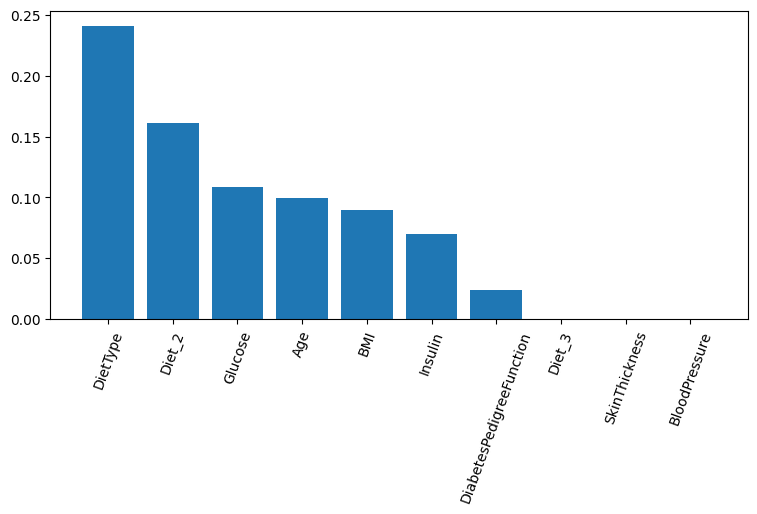

In [86]:
plt.figure(figsize=(9,4))
plt.xticks(rotation=70)
plt.bar(col_names,ig_vals)

Coefficient of variation(dimesionless)= σ/µ 
- in some cases where this variation value is less than a certain threshold we can infer that there is not a lot of variatio and hence such a column can be ignored.

In [87]:
# in stock market scenarios, higher standard deviation does mean higher risk.

In [93]:
#to select k-best features which have the maximum impact on the target variable-
res=SelectKBest(k=4).fit(x,y)
d1={'Factors':x.columns,'Scores':res.scores_}
pd.DataFrame(d1).sort_values(by='Scores',ascending=False)

,Factors,Scores
8,Diet_2,319.605967
7,DietType,232.390194
0,Glucose,213.161752
4,BMI,71.772072
6,Age,46.140611
5,DiabetesPedigreeFunction,23.853309
3,Insulin,13.281108
9,Diet_3,4.476066
2,SkinThickness,4.304381
1,BloodPressure,3.256950


In [94]:
#These above methods are just indicators that certain features are important to the target variable.

In [104]:
etc=ExtraTreesClassifier()
etc.fit(x,y)
etc.feature_importances_
feat_imp=pd.DataFrame({'Features':x.columns,'Scores':etc.feature_importances_})
feat_imp.sort_values(by = 'Scores',ascending=False)

,Features,Scores
8,Diet_2,0.202031
7,DietType,0.176183
0,Glucose,0.147034
6,Age,0.090910
4,BMI,0.080543
5,DiabetesPedigreeFunction,0.071973
1,BloodPressure,0.063632
9,Diet_3,0.059083
2,SkinThickness,0.056902
3,Insulin,0.051710


In [96]:
#Most conclusive is p-value based on different tests - which are in inferential statistics.